# Importing Dependencies

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Loading Data

In [2]:
grocery_items = set()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,waffles,liquor,meat spreads,frozen chicken,pastry,nut snack,organic sausage,beverages,onions,herbs,...,grapes,specialty fat,whole milk,dessert,specialty bar,cake bar,pasta,photo/film,canned fruit,pudding powder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
grocery.columns.tolist()

['waffles',
 'liquor',
 'meat spreads',
 'frozen chicken',
 'pastry',
 'nut snack',
 'organic sausage',
 'beverages',
 'onions',
 'herbs',
 'bottled beer',
 'detergent',
 'pickled vegetables',
 'yogurt',
 'abrasive cleaner',
 'ketchup',
 'frozen vegetables',
 'kitchen towels',
 'frankfurter',
 'chicken',
 'flower soil/fertilizer',
 'dishes',
 'dog food',
 'sliced cheese',
 'frozen dessert',
 'rolls/buns',
 'root vegetables',
 'liqueur',
 'specialty chocolate',
 'honey',
 'nuts/prunes',
 'chewing gum',
 'newspapers',
 'soda',
 'turkey',
 'seasonal products',
 'frozen fruits',
 'semi-finished bread',
 'curd',
 'soap',
 'liquor (appetizer)',
 'packaged fruit/vegetables',
 'potato products',
 'bathroom cleaner',
 'liver loaf',
 'butter',
 'beef',
 'fruit/vegetable juice',
 'fish',
 'specialty vegetables',
 'coffee',
 'ice cream',
 'margarine',
 'oil',
 'specialty cheese',
 'hygiene articles',
 'prosecco',
 'bottled water',
 'decalcifier',
 'cereals',
 'salty snack',
 'zwieback',
 'roll pro

# View Top Sold items

In [5]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


# Visualize Top Sold Items

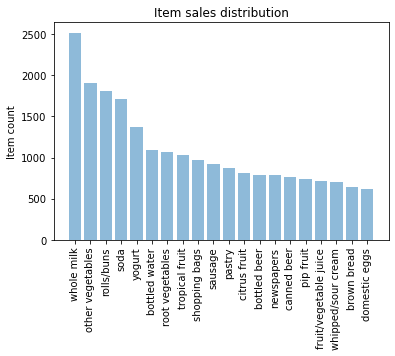

In [6]:
objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

# Generating frequent itemsets

In [7]:
frequent_itemsets = apriori(grocery, min_support=0.047, use_colnames=True)

# Generating rules

In [8]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [14]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
1,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
2,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
7,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
8,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
9,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
